**Завдання:**

1. Завантажте зображення та застосуйте до нього фільтр Собеля для виділення вертикальних та горизонтальних границь. Відобразіть результат.
2. Реалізуйте фільтр Canny для виділення границь на зображенні. Візміть зображення з попереднього завдання. Відобразіть результат.
3. Застосуйте фільтр Робертса для виділення границь на зображенні. Візьміть зображення з попереднього задвання. Відобразіть результат.
4. Порівняйте результати фільтрів Собеля, Кенні та Робертса для виділення границь на зображенні. Обгрунтуйте висновки.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [11]:
img = cv2.imread('maestro_ag.jpg', 0)

**1. Фільтр Собеля.**

In [14]:
def sobel_filter(image):
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])
    image_x = cv2.filter2D(image, -1, sobel_x)
    image_y = cv2.filter2D(image, -1, sobel_y)
    combined_image = cv2.bitwise_or(image_x, image_y)
    return combined_image

In [15]:
sobel_filter_image = sobel_filter(img)

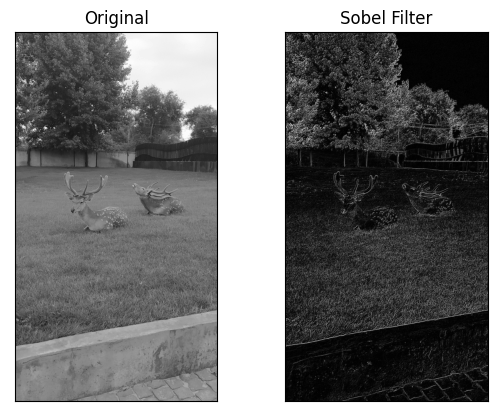

In [19]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sobel_filter_image, cmap = 'gray')
plt.title('Sobel Filter'), plt.xticks([]), plt.yticks([])
plt.show()

**2. Фільтр Кенні.**

In [4]:
edges = cv2.Canny(img, 100, 200)

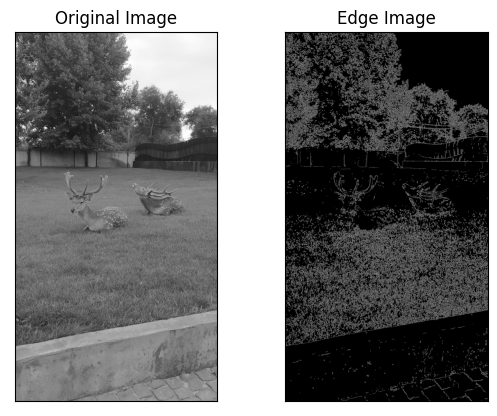

In [5]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

**3. Фільтр Робертса.**

In [6]:
kernel_x = np.array([[1, 0], [0, -1]])
kernel_y = np.array([[0, 1], [-1, 0]])

edges_x = cv2.filter2D(img, -1, kernel_x)
edges_y = cv2.filter2D(img, -1, kernel_y)


edges = np.sqrt(np.square(edges_x) + np.square(edges_y))
edges = np.uint8(edges)

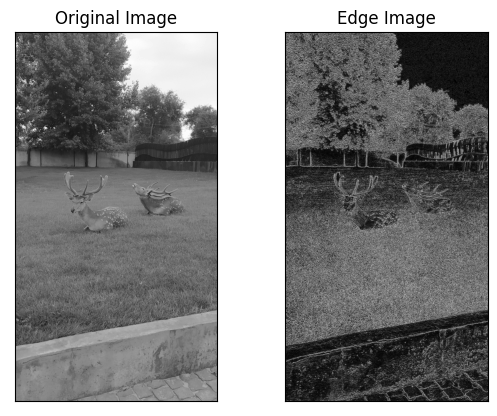

In [7]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

**4. Висновок.**



- В результаті використання фільтру Собеля маємо виділення контурів досить високої якості, але при збільшенні зображення, можемо виявити присутність шумів та нерівність контурів.

- Фільтр Кенні, за рахунок більш складного алгоритму (з використанням гаусовського розмиття для зменшення шуму та інших методів) видав найбільш точний та чистий результат.

- При використанні Фільтра Робертса, отримали найменш точний резултат, в порівнянні з іншими. Проте, даний метод можна використовувати для швидкого виділення контурів з невеликою точністю. 